# Machine Learning Project 02

# Part One: Classifying Review Sentiment with Bag-of-Words Features

# 1.1 Data Processing
## Load the data

In [1]:
import numpy as np
import pandas as pd

x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')

tr_text_list = x_train_df['text'].values.tolist()
for text in tr_text_list:
    print(text)

Oh and I forgot to also mention the weird color effect it has on your phone.
THAT one didn't work either.
Waste of 13 bucks.
Product is useless, since it does not have enough charging current to charge the 2 cellphones I was planning to use it with.
None of the three sizes they sent with the headset would stay in my ears.
Worst customer service.
The Ngage is still lacking in earbuds.
It always cuts out and makes a beep beep beep sound then says signal failed.
the only VERY DISAPPOINTING thing was there was NO SPEAKERPHONE!!!!
Very disappointed in AccessoryOne.
Basically the service was very bad.
Bad Choice.
The only thing that disappoint me is the infra red port (irda).
horrible, had to switch 3 times.
It feels poorly constructed, the menus are difficult to navigate, and the buttons are so recessed that it is difficult to push them.
Don't make the same mistake I did.
Muddy, low quality sound, and the casing around the wire's insert was poorly super glued and slid off.
I advise EVERYONE

# preprocessing the data

Natural Language ToolKit (nltk) is used to preprocess the data.

1. Turn all sentences to lowercase
2. Delete apostrophes
3. Delete punctuations
4. Remove stop words
5. Lemmatization

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# word count 
cv = CountVectorizer()
word_count_vector = cv.fit_transform(tr_text_list)
print(word_count_vector.shape)

# apostrophes
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

# Preprocess Data
def preprocess(review_arr):
  processed = []

  # lowercase
  for text in review_arr:
    processed.append(text.lower())

  # convert apostrophes to standard lexicon 
  negation = []
  for text in processed:
    words = text.split()
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = " ".join(reformed)
    negation.append(reformed)

  # tokenize data by converting text to tokens
  tokenized = []
  for text in negation:
    tokenized.append(word_tokenize(text))

  # remove stopwords
  stop_words = set(stopwords.words('english'))
  for text in tokenized:
    text = [i for i in text if not i in stop_words]
  
  # remove stand-alone punctuation
  stripped = []
  for text in tokenized:
    words = [word for word in text if word.isalpha()]
    stripped.append(words)

  # lemmatization
  lemmas = []
  porter = PorterStemmer()
  for text in stripped:
    lemmafied = []
    for t in text:
      lemmafied.append(porter.stem(t))
    lemmas.append(lemmafied)

  return lemmas


p = preprocess(tr_text_list)
for i in range(20):
    print(p[i])

(2400, 4510)
['oh', 'and', 'i', 'forgot', 'to', 'also', 'mention', 'the', 'weird', 'color', 'effect', 'it', 'ha', 'on', 'your', 'phone']
['that', 'one', 'did', 'not', 'work', 'either']
['wast', 'of', 'buck']
['product', 'is', 'useless', 'sinc', 'it', 'doe', 'not', 'have', 'enough', 'charg', 'current', 'to', 'charg', 'the', 'cellphon', 'i', 'wa', 'plan', 'to', 'use', 'it', 'with']
['none', 'of', 'the', 'three', 'size', 'they', 'sent', 'with', 'the', 'headset', 'would', 'stay', 'in', 'my', 'ear']
['worst', 'custom', 'servic']
['the', 'ngage', 'is', 'still', 'lack', 'in', 'earbud']
['it', 'alway', 'cut', 'out', 'and', 'make', 'a', 'beep', 'beep', 'beep', 'sound', 'then', 'say', 'signal', 'fail']
['the', 'onli', 'veri', 'disappoint', 'thing', 'wa', 'there', 'wa', 'no', 'speakerphon']
['veri', 'disappoint', 'in', 'accessoryon']
['basic', 'the', 'servic', 'wa', 'veri', 'bad']
['bad', 'choic']
['the', 'onli', 'thing', 'that', 'disappoint', 'me', 'is', 'the', 'infra', 'red', 'port', 'irda']
['

## Vectorize preprocessed data to feature vectors using Bag of Words Model and TF-IDF (TfidVectorizer and TfidTransformer)

In [3]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer()

# feature transform training set
x_train_df = pd.read_csv('data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('data/data_reviews/y_train.csv')
tr_text_list = x_train_df['text'].values.tolist()
x_tr_pre = preprocess(tr_text_list)
x_tr = []
for text in x_tr_pre:
  sentence = " ".join(text)
  x_tr.append(sentence)
x_train = vectorizer.fit_transform(x_tr)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

# feature transform testing set
x_test_df = pd.read_csv('data/data_reviews/x_test.csv')
te_text_list = x_test_df['text'].values.tolist()
x_te_pre = preprocess(te_text_list)
x_te = [] 
for text in x_te_pre:
  sentence = " ".join(text)
  x_te.append(sentence)
x_test = vectorizer.transform(x_te)

print(x_train.shape, x_test.shape)

(2400, 3414) (600, 3414)


# 1.2 Logistic Regression

/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BEST SCORE: 
0.81875
STANDARD DEVIATIONS
[0.03578    0.02763854 0.03165022 0.02871677 0.02950989 0.02977345
 0.01640418 0.02904738 0.01197509 0.02822897 0.00962852 0.02190573
 0.00946485 0.02138438 0.01715938 0.01929306 0.0104914  0.02021585
 0.01263813 0.0192119  0.00918559 0.01833333 0.01065559 0.01556795]
STANDARD DEVIATION FOR BEST SCORE:
0.0287167682335213


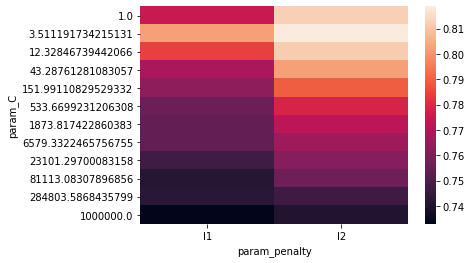

In [4]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
import seaborn as sns

logreg = LogisticRegression(solver='liblinear')

# Grid Search for Hyperparameters
penalty = ['l1','l2']
C = np.logspace(0, 6, 12)
hyperparams = dict(C=C, penalty=penalty)
clf = GridSearchCV(logreg, hyperparams, cv=5, verbose=0)
clf.fit(x_train, y_train_df)
print("BEST SCORE: ")
print(clf.best_score_)
print("STANDARD DEVIATIONS")
print(clf.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf.cv_results_['std_test_score'][clf.best_index_])

pivot = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_C', columns='param_penalty')
ax = sns.heatmap(pivot)

yproba1_test = clf.predict_proba(x_test)[:, 1]
np.savetxt('logreg_yproba1_test.txt', yproba1_test)

## 1.3 Multilayer Perceptron (MLP) Model with Bag-Of-Words

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import seaborn as sns

mlp = MLPClassifier(max_iter=120)

hyperparams = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (256,)],
    'activation': ['identity','logistic', 'relu', 'tanh'],
}

clf_mlp = GridSearchCV(mlp, hyperparams, cv=5, verbose=0)
clf_mlp.fit(x_train, y_train_df.values.ravel()) 
print("BEST SCORE: ")
print(clf_mlp.best_score_)
print("STANDARD DEVIATIONS")
print(clf_mlp.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf_mlp.cv_results_['std_test_score'][clf_mlp.best_index_])

pivot_mlp = pd.pivot_table(pd.DataFrame(clf_mlp.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_activation')

yproba1_test = clf_mlp.predict_proba(x_test)[:, 1]
np.savetxt('mlp_yproba1_test.txt', yproba1_test)

/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimiza

/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


BEST SCORE: 
0.7933333333333332
STANDARD DEVIATIONS
[0.02994787 0.02325134 0.02677712 0.02243819 0.01934698 0.02598744
 0.01774628 0.02546103 0.02094139 0.01847483 0.02348167 0.02256934
 0.02272266 0.02328865 0.02661453 0.02246139]
STANDARD DEVIATION FOR BEST SCORE:
0.017746282865872397


/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


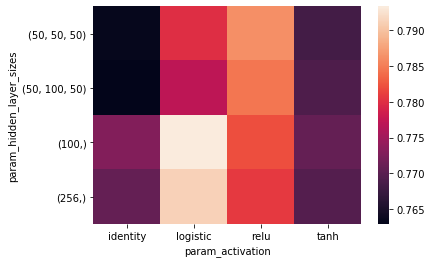

In [6]:
ax_mlp = sns.heatmap(pivot_mlp)

## 1.4 K Nearest Neighbors with Bag-Of-Words

BEST SCORE: 
0.7629166666666667
STANDARD DEVIATIONS
[0.01144128 0.01144128 0.07474958 0.07526112 0.02698379 0.02757565
 0.00805795 0.00870026 0.00618017 0.00552771 0.01333333 0.0124024
 0.01502313 0.01427653 0.01803738 0.01743042 0.0164781  0.0152525
 0.02060711 0.01983438 0.02186607 0.02008662 0.02207154 0.02079162
 0.03080517 0.02225952 0.0209165  0.01902119]
STANDARD DEVIATION FOR BEST SCORE:
0.02008661798865659


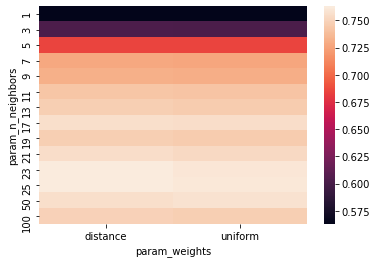

In [7]:
from sklearn.neighbors import KNeighborsClassifier

hyperparams = {
    'n_neighbors' : [1,3,5,7,9,11,13,17,19,21,23,25,50,100],
    'weights' : ['uniform', 'distance']
    }

clf_knn = GridSearchCV(KNeighborsClassifier(), hyperparams, cv=5, verbose=0)
clf_knn.fit(x_train, y_train_df.values.ravel()) 
print("BEST SCORE: ")
print(clf_knn.best_score_)
print("STANDARD DEVIATIONS")
print(clf_knn.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf_knn.cv_results_['std_test_score'][clf_knn.best_index_])

pivot_knn = pd.pivot_table(pd.DataFrame(clf_knn.cv_results_), values='mean_test_score', index='param_n_neighbors', columns='param_weights',)
ax_knn = sns.heatmap(pivot_knn)

yproba1_test = clf_knn.predict_proba(x_test)[:, 1]
np.savetxt('knn_yproba1_test.txt', yproba1_test)

# 1.5 TODO:
# upload & analysis

In [8]:
tr_web_list = x_train_df['website_name'].values.tolist()
rst = clf.predict(x_train)

amazon_p = 0
yelp_p = 0
imdb_p = 0
amazon_n = 0
yelp_n = 0
imdb_n = 0

amazon_tp = 0
yelp_tp = 0
imdb_tp = 0
amazon_tn = 0
yelp_tn = 0
imdb_tn = 0

amazon_fp = 0
yelp_fp = 0
imdb_fp = 0
amazon_fn = 0
yelp_fn = 0
imdb_fn = 0

amazon_avg_rev = 0
yelp_avg_rev = 0
imdb_avg_rev = 0

for i in range(0,2400):
  if tr_web_list[i] == "amazon":
    amazon_avg_rev+=x_train[i].shape[0]
  elif tr_web_list[i] == "yelp":
    yelp_avg_rev+=x_train[i].shape[0]
  elif tr_web_list[i] == "imdb":
    imdb_avg_rev+=x_train[i].shape[0]

amazon_avg_rev = amazon_avg_rev/2400
yelp_avg_rev = yelp_avg_rev/2400
imdb_avg_rev = imdb_avg_rev/2400

for i in range(0,2400):
  if y_train_df.values[i] == 1 and tr_web_list[i] == "amazon":
    amazon_p+=1
  elif y_train_df.values[i] == 1 and tr_web_list[i] == "yelp":
    yelp_p+=1
  elif y_train_df.values[i] == 1 and tr_web_list[i] == "imdb":
    imdb_p+=1
  elif y_train_df.values[i] == 0 and tr_web_list[i] == "amazon":
    amazon_n+=1
  elif y_train_df.values[i] == 0 and tr_web_list[i] == "yelp":
    yelp_n+=1
  elif y_train_df.values[i] == 0 and tr_web_list[i] == "imdb":
    imdb_n+=1

for i in range(0,2400):
  if rst[i] == 1 and y_train_df.values[i] == 1 and tr_web_list[i] == "amazon":
    amazon_tp+=1
  elif rst[i] == 1 and y_train_df.values[i] == 1 and tr_web_list[i] == "yelp":
    yelp_tp+=1
  elif rst[i] == 1 and y_train_df.values[i] == 1 and tr_web_list[i] == "imdb":
    imdb_tp+=1
  elif rst[i] == 0 and y_train_df.values[i] == 0 and tr_web_list[i] == "amazon":
    amazon_tn+=1
  elif rst[i] == 0 and y_train_df.values[i] == 0 and tr_web_list[i] == "yelp":
    yelp_tn+=1
  elif rst[i] == 0 and y_train_df.values[i] == 0 and tr_web_list[i] == "imdb":
    imdb_tn+=1
  elif rst[i] == 1 and y_train_df.values[i] == 0 and tr_web_list[i] == "amazon":
    amazon_fn+=1
  elif rst[i] == 1 and y_train_df.values[i] == 0 and tr_web_list[i] == "yelp":
    yelp_fn+=1
  elif rst[i] == 1 and y_train_df.values[i] == 0 and tr_web_list[i] == "imdb":
    imdb_fn+=1
  elif rst[i] == 0 and y_train_df.values[i] == 1 and tr_web_list[i] == "amazon":
    amazon_fp+=1
  elif rst[i] == 0 and y_train_df.values[i] == 1 and tr_web_list[i] == "yelp":
    yelp_fp+=1
  elif rst[i] == 0 and y_train_df.values[i] == 1 and tr_web_list[i] == "imdb":
    imdb_fp+=1

print("OVERALL ACCURACY")
print(".81875")
print("AMAZON ACCURACY")
print(str((amazon_tp+amazon_tn)/(amazon_n+amazon_p)))
print("YELP ACCURACY")
print(str((yelp_tp+yelp_tn)/(yelp_n+yelp_p)))
print("IMDB ACCURACY")
print(str((imdb_tp+imdb_tn)/(imdb_n+imdb_p)))
print("AMAZON TRUE POSITIVE")
print(str((amazon_tp)/(amazon_p)))
print("YELP TRUE POSITIVE")
print(str((yelp_tp)/(yelp_p)))
print("IMDB TRUE POSITIVE")
print(str((imdb_tp)/(imdb_p)))
print("AMAZON TRUE NEGATIVE")
print(str((amazon_tn)/(amazon_n)))
print("YELP TRUE NEGATIVE")
print(str((yelp_tn)/(yelp_n)))
print("IMDB TRUE NEGATIVE")
print(str((imdb_tn)/(imdb_n)))
print("AMAZON FALSE POSITIVE")
print(str((amazon_fp)/(amazon_p)))
print("YELP FALSE POSITIVE")
print(str((yelp_fp)/(yelp_p)))
print("IMDB FALSE POSITIVE")
print(str((imdb_fp)/(imdb_p)))
print("AMAZON FALSE NEGATIVE")
print(str((amazon_fn)/(amazon_n)))
print("YELP FALSE NEGATIVE")
print(str((yelp_fn)/(yelp_n)))
print("IMDB FALSE NEGATIVE")
print(str((imdb_fn)/(imdb_n)))

OVERALL ACCURACY
.81875
AMAZON ACCURACY
0.9725
YELP ACCURACY
0.96375
IMDB ACCURACY
0.95375
AMAZON TRUE POSITIVE
0.9675
YELP TRUE POSITIVE
0.9475
IMDB TRUE POSITIVE
0.935
AMAZON TRUE NEGATIVE
0.9775
YELP TRUE NEGATIVE
0.98
IMDB TRUE NEGATIVE
0.9725
AMAZON FALSE POSITIVE
0.0325
YELP FALSE POSITIVE
0.0525
IMDB FALSE POSITIVE
0.065
AMAZON FALSE NEGATIVE
0.0225
YELP FALSE NEGATIVE
0.02
IMDB FALSE NEGATIVE
0.0275


# Part Two: Classifying Review Sentiment with Word Embeddings

## 2.1 Pipeline for Classifying Review Sentiment with Word Embeddings

In [9]:
from collections import OrderedDict

word_embeddings = pd.read_csv('data/pretrained_word_embeddings/glove.6B.50d.txt',
                               header=None, sep=' ', index_col=0,
                               nrows=100000, encoding='utf-8', quoting=3)
# Build a dict that will map from string word to 50-dim vector
word_list = word_embeddings.index.values.tolist()
word2vec = OrderedDict(zip(word_list, word_embeddings.values))

def vectorizer(sentence):
  sent_vec = np.zeros(50)
  numw = 0
  for w in sentence:
    try: 
      vc = word2vec[w]
      vc = [i * tfidf[w] for i in vc]
      vc=vc[0:50]
      sent_vec = np.add(sent_vec, vc)
      numw+=1
    except:
      pass
  return sent_vec / np.sqrt(sent_vec.dot(sent_vec))

X_train_pre = []
for sentence in preprocess(tr_text_list):
  X_train_pre.append(vectorizer(sentence))

X_train = []
for sentence in X_train_pre:
  arr = []
  for word in sentence:
    if np.isnan(word):
      arr.append(0)
    else:
      arr.append(word)
  X_train.append(arr)

x_train = np.array(X_train)

X_test_pre = []
te_text_list = x_test_df['text'].values.tolist()
for sentence in preprocess(te_text_list):
  X_test_pre.append(vectorizer(sentence))

X_test = []
for sentence in X_test_pre:
  arr = []
  for word in sentence:
    if np.isnan(word):
      arr.append(0)
    else:
      arr.append(word)
  X_test.append(arr)

x_test = np.array(X_test)

print(x_test.shape)
print(x_train.shape)

<ipython-input-9-f4507c070523>:22: RuntimeWarning: invalid value encountered in true_divide
  return sent_vec / np.sqrt(sent_vec.dot(sent_vec))


(600, 50)
(2400, 50)


## 2.2 Logistic Regression and Word Embeddings

BEST SCORE: 
0.7162499999999999
STANDARD DEVIATIONS
[0.02214222 0.01942757 0.02519369 0.02138438 0.02354812 0.02624008
 0.02206367 0.02322146 0.02409472 0.02169069 0.02348167 0.02402978
 0.02325881 0.02283698 0.02325881 0.02322146 0.02325881 0.02322146
 0.02325881 0.02322146 0.02325881 0.02322146 0.02325881 0.02322146]
STANDARD DEVIATION FOR BEST SCORE:
0.019427572044791275


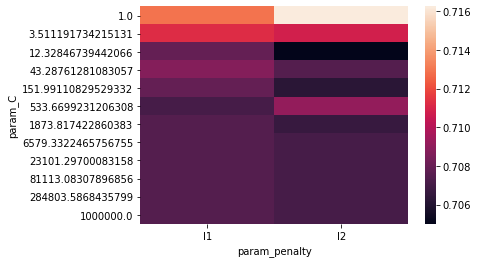

In [10]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
import seaborn as sns

logreg = LogisticRegression(solver='liblinear')
# Grid Search for Hyperparameters
penalty = ['l1', 'l2']
C = np.logspace(0, 6, 12)
hyperparams = dict(C=C, penalty=penalty)
clf = GridSearchCV(logreg, hyperparams, cv=5, verbose=0)
clf.fit(x_train, y_train_df.values.ravel())
print("BEST SCORE: ")
print(clf.best_score_)
print("STANDARD DEVIATIONS")
print(clf.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf.cv_results_['std_test_score'][clf.best_index_])

pivot = pd.pivot_table(pd.DataFrame(clf.cv_results_), values='mean_test_score', index='param_C', columns='param_penalty')
ax = sns.heatmap(pivot)

yproba1_test = clf.predict_proba(x_test)[:, 1]
np.savetxt('clf_yproba1_test.txt', yproba1_test)

## 2.3 Multilayer Perceptrons (MLP) and Word Embeddings

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

mlp = MLPClassifier(max_iter=120)

hyperparams = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (256,)],
    'activation': ['identity','logistic', 'relu', 'tanh'],
}

clf_mlp = GridSearchCV(mlp, hyperparams, cv=5, verbose=0)
clf_mlp.fit(x_train, y_train_df.values.ravel()) 
print("BEST SCORE: ")
print(clf_mlp.best_score_)
print("STANDARD DEVIATIONS")
print(clf_mlp.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf_mlp.cv_results_['std_test_score'][clf_mlp.best_index_])

pivot_mlp = pd.pivot_table(pd.DataFrame(clf_mlp.cv_results_), values='mean_test_score', index='param_hidden_layer_sizes', columns='param_activation')

/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimiza

/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimiza

BEST SCORE: 
0.7204166666666667
STANDARD DEVIATIONS
[0.02636549 0.02298852 0.02038688 0.02563093 0.02035279 0.02202429
 0.02550191 0.02266912 0.02605416 0.02052268 0.02321398 0.02752524
 0.02416667 0.02527625 0.02362173 0.02325134]
STANDARD DEVIATION FOR BEST SCORE:
0.02321398046197353


/home/jiawei/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  warnings.warn(


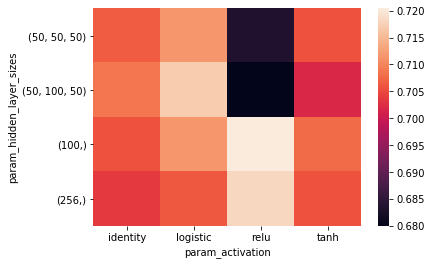

In [12]:
ax = sns.heatmap(pivot_mlp)
yproba1_test = clf_mlp.predict_proba(x_test)[:, 1]
np.savetxt('mlp_yproba1_test.txt', yproba1_test)

## 2.4 KNN and Word Embedding

BEST SCORE: 
0.6825
STANDARD DEVIATIONS
[0.0242384  0.0242384  0.00653516 0.00738335 0.01125771 0.01188779
 0.01259685 0.01304373 0.01025711 0.01125771 0.00805795 0.010425
 0.01075291 0.01107111 0.0260008  0.02620698 0.02430992 0.02480479
 0.02487469 0.02359231 0.02353337 0.02306392 0.02106537 0.02163459
 0.01951673 0.01606195 0.0157233  0.01375631]
STANDARD DEVIATION FOR BEST SCORE:
0.016061946056163626


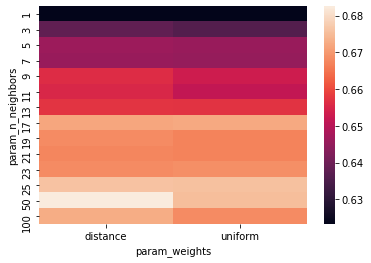

In [13]:
from sklearn.neighbors import KNeighborsClassifier

hyperparams = {
    'n_neighbors' : [1,3,5,7,9,11,13,17,19,21,23,25,50,100],
    'weights' : ['uniform', 'distance']
    }

clf_knn = GridSearchCV(KNeighborsClassifier(), hyperparams, cv=5, verbose=0)
clf_knn.fit(x_train, y_train_df.values.ravel()) 
print("BEST SCORE: ")
print(clf_knn.best_score_)
print("STANDARD DEVIATIONS")
print(clf_knn.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf_knn.cv_results_['std_test_score'][clf_knn.best_index_])

pivot_knn = pd.pivot_table(pd.DataFrame(clf_knn.cv_results_), values='mean_test_score', index='param_n_neighbors', columns='param_weights',)
ax_knn = sns.heatmap(pivot_knn)


## 2.4 Support Vector Machines and Word Embedding

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns

svc = SVC(probability=True)
hyperparams = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma' : [0.001, 0.01, 0.1, 1]
}
clf_svc = GridSearchCV(svc, hyperparams, cv=5, verbose=0)
clf_svc.fit(x_train, y_train_df.values.ravel()) 
print("BEST SCORE: ")
print(clf_svc.best_score_)
print("STANDARD DEVIATIONS")
print(clf_svc.cv_results_['std_test_score'])
print("STANDARD DEVIATION FOR BEST SCORE:")
print(clf_svc.cv_results_['std_test_score'][clf_svc.best_index_])

pivot_mlp = pd.pivot_table(pd.DataFrame(clf_svc.cv_results_), values='mean_test_score', index='param_C', columns='param_gamma')

BEST SCORE: 
0.7158333333333334
STANDARD DEVIATIONS
[0.02666667 0.02811805 0.02968001 0.03013281 0.02666667 0.02811805
 0.02968001 0.03013281 0.02666667 0.02811805 0.02968001 0.02827813
 0.02666667 0.02811805 0.02428134 0.02276846 0.02666667 0.02365845
 0.0225     0.02462919]
STANDARD DEVIATION FOR BEST SCORE:
0.02276846015385707


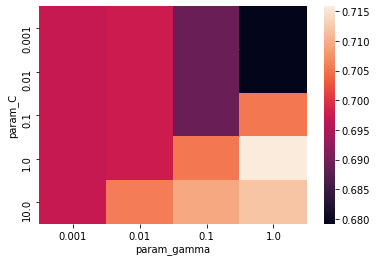

In [18]:
ax = sns.heatmap(pivot_mlp)
yproba1_test = clf_svc.predict_proba(x_test)[:, 1]
np.savetxt('svc_yproba1_test.txt', yproba1_test)

# 2.5 Summary and Submission:
## TODO

In [19]:
tr_web_list = x_train_df['website_name'].values.tolist()
rst = clf.predict(x_train)

amazon_p = 0
yelp_p = 0
imdb_p = 0
amazon_n = 0
yelp_n = 0
imdb_n = 0

amazon_tp = 0
yelp_tp = 0
imdb_tp = 0
amazon_tn = 0
yelp_tn = 0
imdb_tn = 0

amazon_fp = 0
yelp_fp = 0
imdb_fp = 0
amazon_fn = 0
yelp_fn = 0
imdb_fn = 0

amazon_avg_rev = 0
yelp_avg_rev = 0
imdb_avg_rev = 0

for i in range(0,2400):
  if tr_web_list[i] == "amazon":
    amazon_avg_rev+=x_train[i].shape[0]
  elif tr_web_list[i] == "yelp":
    yelp_avg_rev+=x_train[i].shape[0]
  elif tr_web_list[i] == "imdb":
    imdb_avg_rev+=x_train[i].shape[0]

amazon_avg_rev = amazon_avg_rev/2400
yelp_avg_rev = yelp_avg_rev/2400
imdb_avg_rev = imdb_avg_rev/2400

for i in range(0,2400):
  if y_train_df.values[i] == 1 and tr_web_list[i] == "amazon":
    amazon_p+=1
  elif y_train_df.values[i] == 1 and tr_web_list[i] == "yelp":
    yelp_p+=1
  elif y_train_df.values[i] == 1 and tr_web_list[i] == "imdb":
    imdb_p+=1
  elif y_train_df.values[i] == 0 and tr_web_list[i] == "amazon":
    amazon_n+=1
  elif y_train_df.values[i] == 0 and tr_web_list[i] == "yelp":
    yelp_n+=1
  elif y_train_df.values[i] == 0 and tr_web_list[i] == "imdb":
    imdb_n+=1

for i in range(0,2400):
  if rst[i] == 1 and y_train_df.values[i] == 1 and tr_web_list[i] == "amazon":
    amazon_tp+=1
  elif rst[i] == 1 and y_train_df.values[i] == 1 and tr_web_list[i] == "yelp":
    yelp_tp+=1
  elif rst[i] == 1 and y_train_df.values[i] == 1 and tr_web_list[i] == "imdb":
    imdb_tp+=1
  elif rst[i] == 0 and y_train_df.values[i] == 0 and tr_web_list[i] == "amazon":
    amazon_tn+=1
  elif rst[i] == 0 and y_train_df.values[i] == 0 and tr_web_list[i] == "yelp":
    yelp_tn+=1
  elif rst[i] == 0 and y_train_df.values[i] == 0 and tr_web_list[i] == "imdb":
    imdb_tn+=1
  elif rst[i] == 1 and y_train_df.values[i] == 0 and tr_web_list[i] == "amazon":
    amazon_fn+=1
  elif rst[i] == 1 and y_train_df.values[i] == 0 and tr_web_list[i] == "yelp":
    yelp_fn+=1
  elif rst[i] == 1 and y_train_df.values[i] == 0 and tr_web_list[i] == "imdb":
    imdb_fn+=1
  elif rst[i] == 0 and y_train_df.values[i] == 1 and tr_web_list[i] == "amazon":
    amazon_fp+=1
  elif rst[i] == 0 and y_train_df.values[i] == 1 and tr_web_list[i] == "yelp":
    yelp_fp+=1
  elif rst[i] == 0 and y_train_df.values[i] == 1 and tr_web_list[i] == "imdb":
    imdb_fp+=1

print("OVERALL ACCURACY")
print(".81875")
print("AMAZON ACCURACY")
print(str((amazon_tp+amazon_tn)/(amazon_n+amazon_p)))
print("YELP ACCURACY")
print(str((yelp_tp+yelp_tn)/(yelp_n+yelp_p)))
print("IMDB ACCURACY")
print(str((imdb_tp+imdb_tn)/(imdb_n+imdb_p)))
print("AMAZON TRUE POSITIVE")
print(str((amazon_tp)/(amazon_p)))
print("YELP TRUE POSITIVE")
print(str((yelp_tp)/(yelp_p)))
print("IMDB TRUE POSITIVE")
print(str((imdb_tp)/(imdb_p)))
print("AMAZON TRUE NEGATIVE")
print(str((amazon_tn)/(amazon_n)))
print("YELP TRUE NEGATIVE")
print(str((yelp_tn)/(yelp_n)))
print("IMDB TRUE NEGATIVE")
print(str((imdb_tn)/(imdb_n)))
print("AMAZON FALSE POSITIVE")
print(str((amazon_fp)/(amazon_p)))
print("YELP FALSE POSITIVE")
print(str((yelp_fp)/(yelp_p)))
print("IMDB FALSE POSITIVE")
print(str((imdb_fp)/(imdb_p)))
print("AMAZON FALSE NEGATIVE")
print(str((amazon_fn)/(amazon_n)))
print("YELP FALSE NEGATIVE")
print(str((yelp_fn)/(yelp_n)))
print("IMDB FALSE NEGATIVE")
print(str((imdb_fn)/(imdb_n)))

OVERALL ACCURACY
.81875
AMAZON ACCURACY
0.7425
YELP ACCURACY
0.715
IMDB ACCURACY
0.715
AMAZON TRUE POSITIVE
0.6875
YELP TRUE POSITIVE
0.7275
IMDB TRUE POSITIVE
0.695
AMAZON TRUE NEGATIVE
0.7975
YELP TRUE NEGATIVE
0.7025
IMDB TRUE NEGATIVE
0.735
AMAZON FALSE POSITIVE
0.3125
YELP FALSE POSITIVE
0.2725
IMDB FALSE POSITIVE
0.305
AMAZON FALSE NEGATIVE
0.2025
YELP FALSE NEGATIVE
0.2975
IMDB FALSE NEGATIVE
0.265
